<a href="https://colab.research.google.com/github/damianmtz98/Aprendizaje-Automatico-MCD/blob/main/Tarea%205%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea en clase (2 puntos)**
* Investigar sobre algún otro algoritmo no supervisado que pueda usarse en tu código. Da un panorama sobre el modelo matemático que emplea y explica por qué conviene aplicarlo a tus datos. Algunos modelos que no se vieron en clase son Affinity Propagation, BIRCH, DBSCAN, Mean Shift, Nearest Neighbors, OPTICS, Spectral Clustering, TSNE, entre otros

* Investigar otras estrategias para determinar número de grupos en estos algoritmos (como los índices de Calinski-Harabasz o de Davies-Bouldin), elegir la más adecuada al método que elegiste
# **Tarea (8 puntos)**
* Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
* Elegir alguna métrica para determinar número de grupos, usarla y discutirla
* Busca alguna revista científica que publique trabajos relacionados con el tuyo
* Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía
* Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

# **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Es un algoritmo de agrupamiento no paramétrico utilizado en el aprendizaje automático y la minería de datos para encontrar grupos o "clústeres" en un conjunto de datos. A diferencia de algunos algoritmos de agrupamiento, como K-means, DBSCAN no requiere que se especifique el número de clústeres de antemano y puede detectar clústeres de formas arbitrarias.

DBSCAN se basa en la densidad de los puntos de datos para agruparlos en clústeres. El algoritmo define dos parámetros principales: el "radio" y el "número mínimo de puntos" (minPts). El radio determina el tamaño del vecindario de cada punto de datos y el minPts establece el número mínimo de puntos de datos necesarios para formar un clúster.

El proceso de DBSCAN comienza con la selección de un punto de datos aleatorios y la identificación de todos los puntos de datos que se encuentran dentro del vecindario del radio. Si el número de puntos de datos en el vecindario es igual o mayor al minPts, entonces se considera un clúster y se agregan todos los puntos de datos del vecindario al clúster. Si el número de puntos de datos en el vecindario es menor que el minPts, entonces el punto de datos se considera un "ruido" y se ignora.

El proceso se repite para cada punto de datos dentro de un clúster y se continúa hasta que se han identificado todos los clústeres posibles.

In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv("heart_prediction.csv")
# Utilizamos las variables que son mas relevantes segun la tarea 4.
df = df[['Chest pain type', 'Sex', 'Cholesterol', 'Exercise angina', 'Max HR', 'Age', 'Cardiopatia']]
df.head

<bound method NDFrame.head of      Chest pain type  Sex  Cholesterol  Exercise angina  Max HR  Age  \
0                  4    1          322                0     109   70   
1                  3    0          564                0     160   67   
2                  2    1          261                0     141   57   
3                  4    1          263                1     105   64   
4                  2    0          269                1     121   74   
..               ...  ...          ...              ...     ...  ...   
265                3    1          199                0     162   52   
266                2    1          263                0     173   44   
267                2    0          294                0     153   56   
268                4    1          192                0     148   57   
269                4    1          286                1     108   67   

     Cardiopatia  
0              0  
1              1  
2              0  
3              1  
4         

In [89]:
X = df
y = df['Cardiopatia']

In [90]:
cols = df.columns
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df = ms.fit_transform(df)

In [91]:
X = pd.DataFrame(df, columns=[cols])
X.head()

,Chest pain type,Sex,Cholesterol,Exercise angina,Max HR,Age,Cardiopatia
0,1.000000,1.0,0.447489,0.0,0.290076,0.854167,0.0
1,0.666667,0.0,1.000000,0.0,0.679389,0.791667,1.0
2,0.333333,1.0,0.308219,0.0,0.534351,0.583333,0.0
3,1.000000,1.0,0.312785,1.0,0.259542,0.729167,1.0
4,0.333333,0.0,0.326484,1.0,0.381679,0.937500,1.0


# **Metodo del Codo**


In [93]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 270, n_init = 10, random_state = 0)
  kmeans.fit(X)
  cs.append(kmeans.inertia_)

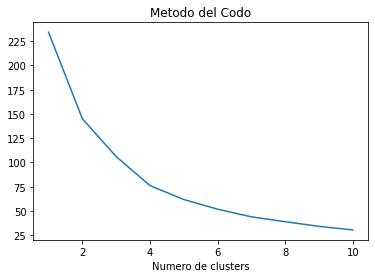

In [94]:
plt.plot(range(1, 11), cs)
plt.title('Metodo del Codo')
plt.xlabel('Numero de clusters')
plt.ylabel('')
plt.show()

In [70]:
# Analisis
kmeans.cluster_centers_ 

array([[ 6.21468927e-01,  4.44089210e-16,  2.95604055e-01,
         2.77555756e-16,  6.40703843e-01,  5.36370056e-01,
         1.00000000e+00],
       [ 9.63636364e-01,  1.00000000e+00,  2.93441262e-01,
         1.00000000e+00,  4.45107564e-01,  5.75757576e-01,
        -5.55111512e-16],
       [ 2.34567901e-01,  1.00000000e+00,  2.60781329e-01,
        -1.11022302e-16,  7.16426350e-01,  4.39814815e-01,
         1.00000000e+00],
       [ 8.85714286e-01,  1.00000000e+00,  2.55772994e-01,
         1.11022302e-16,  5.76663032e-01,  5.43452381e-01,
        -1.11022302e-16],
       [ 1.00000000e+00, -2.22044605e-16,  3.89726027e-01,
         1.00000000e+00,  5.68702290e-01,  5.87500000e-01,
         1.11022302e-16],
       [ 6.44444444e-01,  1.00000000e+00,  2.26027397e-01,
         1.00000000e+00,  5.88804071e-01,  5.15277778e-01,
         1.00000000e+00],
       [ 7.50000000e-01, -1.11022302e-16,  3.28767123e-01,
         1.00000000e+00,  6.34541985e-01,  5.07812500e-01,
         1.0000000

In [71]:
kmeans.inertia_

30.58111419359993

In [72]:
# Cluster = 1
kmeans = KMeans(n_clusters=1, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("%d de %d " % (correct_labels, y.size))
print('{0:0.2f}'. format(correct_labels/float(y.size)))

120 de 270 
0.44


In [73]:
# Cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("%d de %d " % (correct_labels, y.size))
print('{0:0.2f}'. format(correct_labels/float(y.size)))

3 de 270 
0.01


In [74]:
# Cluster = 7
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("%d de %d " % (correct_labels, y.size))
print('{0:0.2f}'. format(correct_labels/float(y.size)))

112 de 270 
0.41


In [75]:
# Cluster = 8
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("%d de %d " % (correct_labels, y.size))
print('{0:0.2f}'. format(correct_labels/float(y.size)))

83 de 270 
0.31


In [76]:
# Cluster = 9
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("%d de %d " % (correct_labels, y.size))
print('{0:0.2f}'. format(correct_labels/float(y.size)))

103 de 270 
0.38


Dado los resultados podemos concluir que con una precision del 44% la cantidad de cluster seria de 1.